In [1]:
data_ori <- "Grp_1;Grp_2;Grp_3;Grp_4;Grp_5
a;6.6;20.9;100.1;600.0;5.2
b;20.8;99.8;700.0;3.7;19.2
c;100.0;800.0;6.2;21.4;98.6
d;900;3.3;20.3;101.1;10000"

In [29]:
library(pheatmap)

In [3]:
(data <- read.table(text = data_ori, header = T, row.names = 1, sep = ";", quote = ""))

,Grp_1,Grp_2,Grp_3,Grp_4,Grp_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,6.6,20.9,100.1,600.0,5.2
b,20.8,99.8,700.0,3.7,19.2
c,100.0,800.0,6.2,21.4,98.6
d,900.0,3.3,20.3,101.1,10000.0


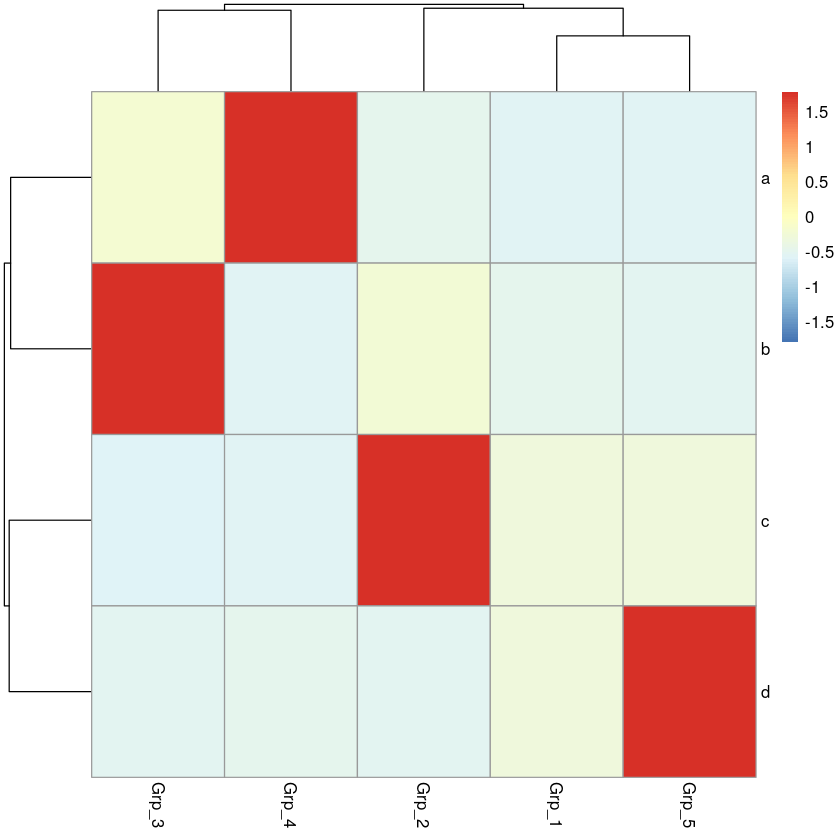

In [16]:
pheatmap(data, scale = "row")

,type,class
,<fct>,<fct>
a,TF,clu1
b,Enzyme,clu1
c,Enzyme,clu2
d,TF,clu2


,grp,size
,<fct>,<int>
Grp_1,A,1
Grp_2,A,2
Grp_3,A,3
Grp_4,B,4
Grp_5,B,5


,Grp_1,Grp_2,Grp_3,Grp_4,Grp_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,6.6,20.9,100.1,600.0,5.2
b,20.8,99.8,700.0,3.7,19.2
c,100.0,800.0,6.2,21.4,98.6
d,900.0,3.3,20.3,101.1,10000.0


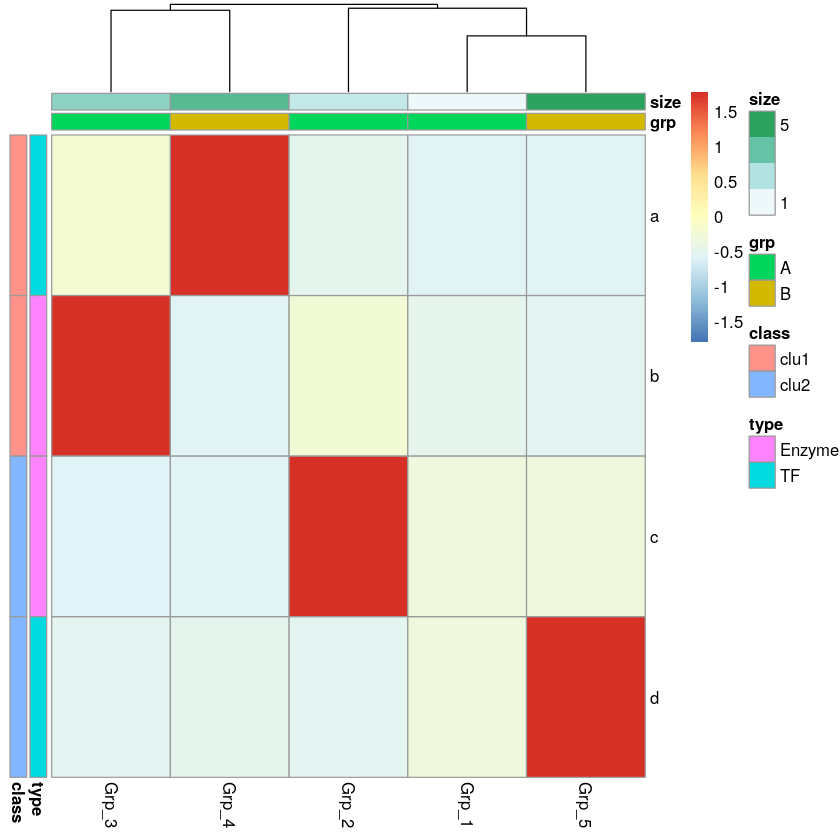

In [20]:
row_anno = data.frame(type=c("TF","Enzyme","Enzyme","TF"), class=c("clu1","clu1","clu2","clu2"), row.names=rownames(data))
row_anno

col_anno = data.frame(grp=c("A","A","A","B","B"), size=1:5, row.names=colnames(data))
col_anno
data
pheatmap::pheatmap(data, scale="row", 
cluster_rows=FALSE, 
annotation_col=col_anno,
annotation_row=row_anno)

In [7]:
library(tidyverse)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [30]:
countp <- read.table("./data/count_2Phylum.txt", header = T, row.names = 1, sep = "\t", quote = "")

In [31]:
countp 

,CWB3,CWB2,CWB1,YH3,YH2,YH1,Bar1,Bar2,Bar3,YW1,YW2,YW3,EB1,EB2,EB3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Crenarchaeota,11478,4253,1988,320,154,371,387,1329,1189,30,6,108,943,594,654
Diapherotrites,41,75,59,74,31,19,36,26,98,381,93,207,88,133,125
Euryarchaeota,6231,967,921,18233,51493,16061,3199,5973,8854,19932,13929,36022,41433,37970,36960
Thaumarchaeota,42,30,21,37,26,26,33,3,9,7,20,4,41,10,74
Unassigned,4362,4540,2638,3183,1826,1137,15018,13928,19646,3595,3071,6679,2055,1708,1529
unidentified_Archaea,2450,3181,1755,927,130,116,17138,7410,12493,3668,1905,4907,2656,2030,2140
Unknown,0,0,0,0,0,0,758,454,1940,20,2,44,6,1,1


In [32]:
metadata <- read.table("./data/metadata.tsv", header = T,  sep = "\t", quote = "")

(metadata2 <- metadata[,1:ncol(metadata)-1])
rownames(metadata2) <- metadata[,1]
metadata2[,1] = "5hp"# 为了凑数的
metadata2

row_anno <- read.table("./data/row_anno.tsv", header = T, row.names = 1, sep = "\t", quote = "")
row_anno

SampleID,Genotype
<fct>,<fct>
Bar1,Bar
Bar2,Bar
Bar3,Bar
CWB1,CWB
CWB2,CWB
CWB3,CWB
EB1,EB
EB2,EB
EB3,EB


,SampleID,Genotype
,<chr>,<fct>
Bar1,5hp,Bar
Bar2,5hp,Bar
Bar3,5hp,Bar
CWB1,5hp,CWB
CWB2,5hp,CWB
CWB3,5hp,CWB
EB1,5hp,EB
EB2,5hp,EB
EB3,5hp,EB


,K,P
,<fct>,<fct>
Crenarchaeota,Archaea,Crenarchaeota
Diapherotrites,Archaea,Diapherotrites
Euryarchaeota,Archaea,Euryarchaeota
Thaumarchaeota,Archaea,Thaumarchaeota
Unassigned,Archaea,Unassigned
unidentified_Archaea,Archaea,unidentified_Archaea
Unknown,Unknown,Unknown


In [41]:
# pheatmap(countp, scale = "row")
pheatmap(countp, scale = "row", cellwidth = 28, cellheight = 28, annotation_col =  metadata2, annotation_row = row_anno, filename="pheatmap_countp.pdf")


phetmp> # Create test matrix
phetmp> test = matrix(rnorm(200), 20, 10)

phetmp> test[1:10, seq(1, 10, 2)] = test[1:10, seq(1, 10, 2)] + 3

phetmp> test[11:20, seq(2, 10, 2)] = test[11:20, seq(2, 10, 2)] + 2

phetmp> test[15:20, seq(2, 10, 2)] = test[15:20, seq(2, 10, 2)] + 4

phetmp> colnames(test) = paste("Test", 1:10, sep = "")

phetmp> rownames(test) = paste("Gene", 1:20, sep = "")

phetmp> # Draw heatmaps
phetmp> pheatmap(test)

phetmp> pheatmap(test, kmeans_k = 2)


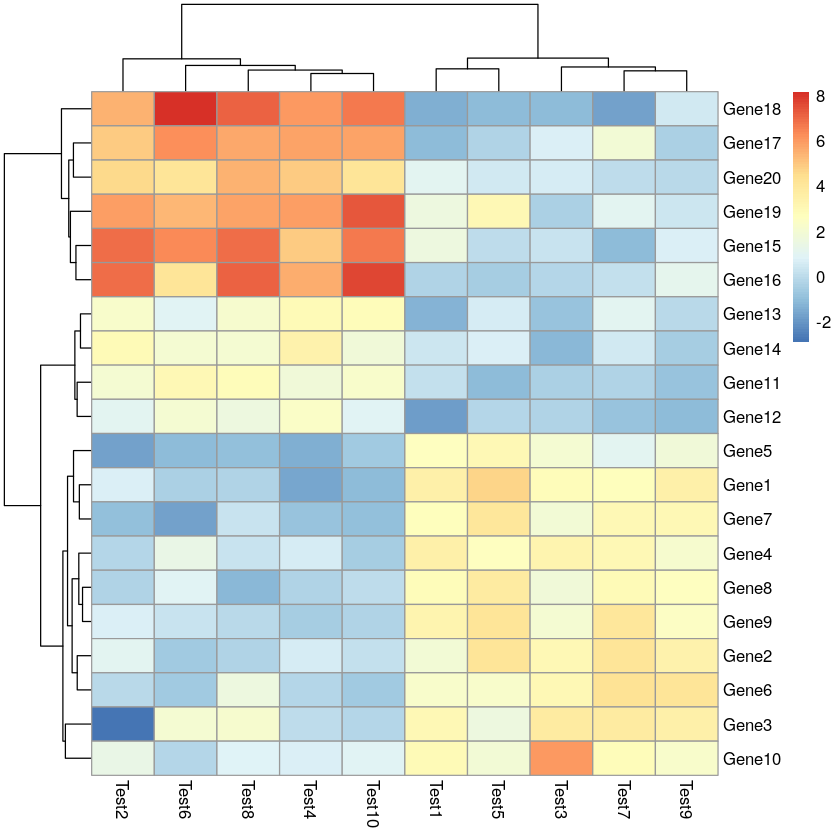


phetmp> pheatmap(test, scale = "row", clustering_distance_rows = "correlation")


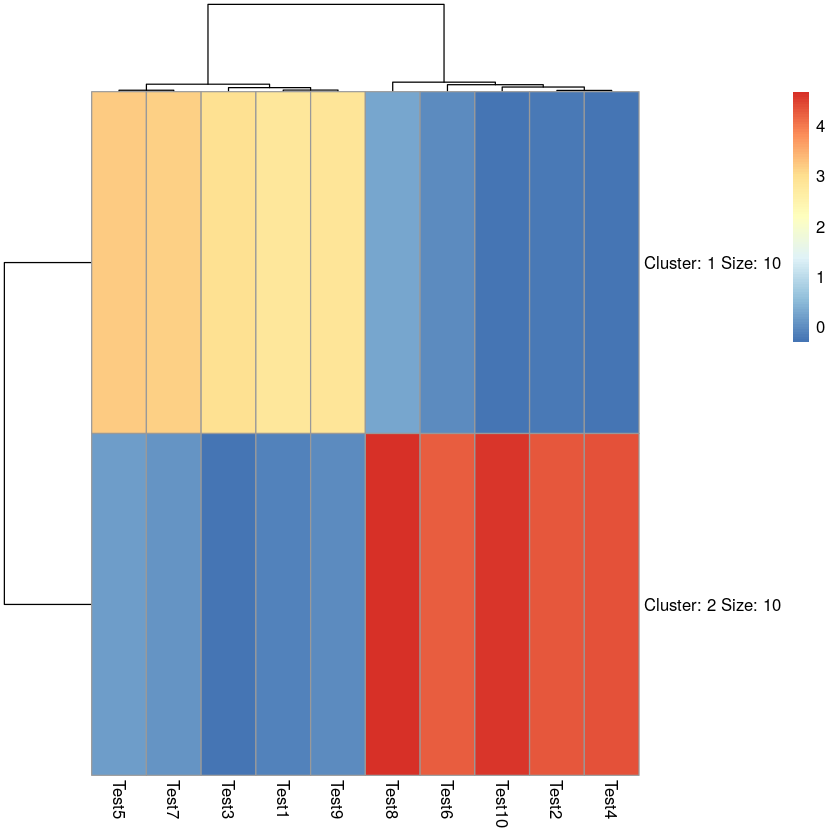


phetmp> pheatmap(test, color = colorRampPalette(c("navy", "white", "firebrick3"))(50))


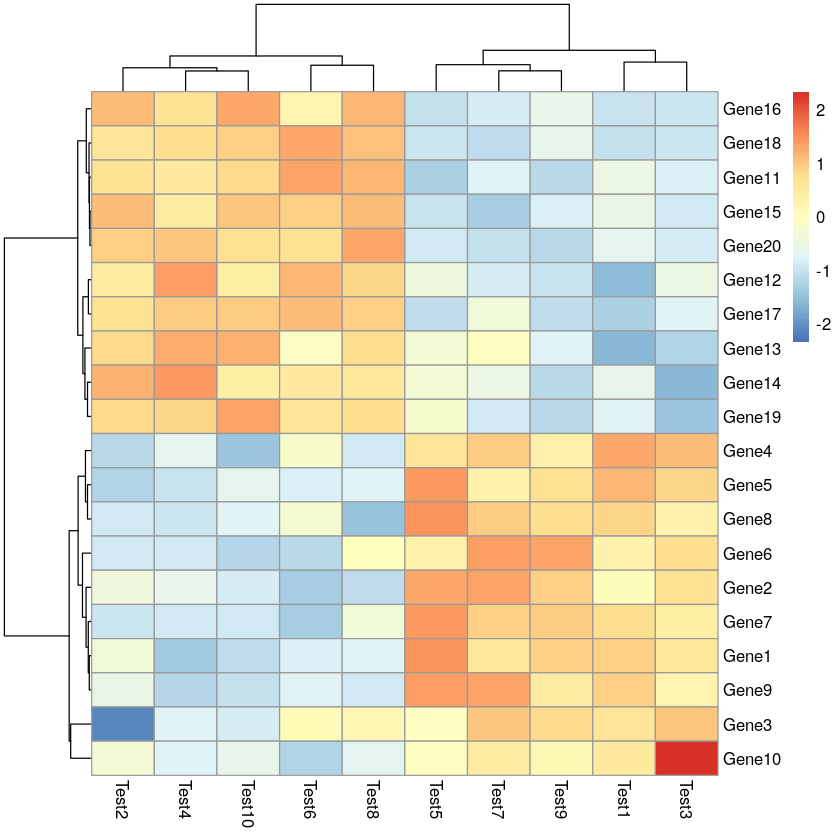


phetmp> pheatmap(test, cluster_row = FALSE)


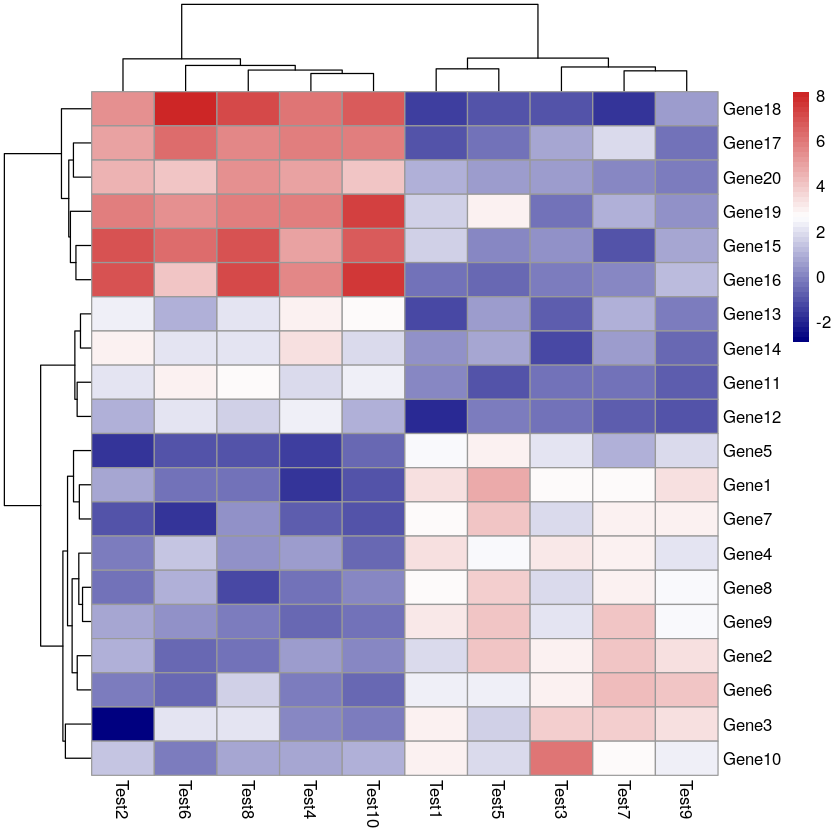


phetmp> pheatmap(test, legend = FALSE)


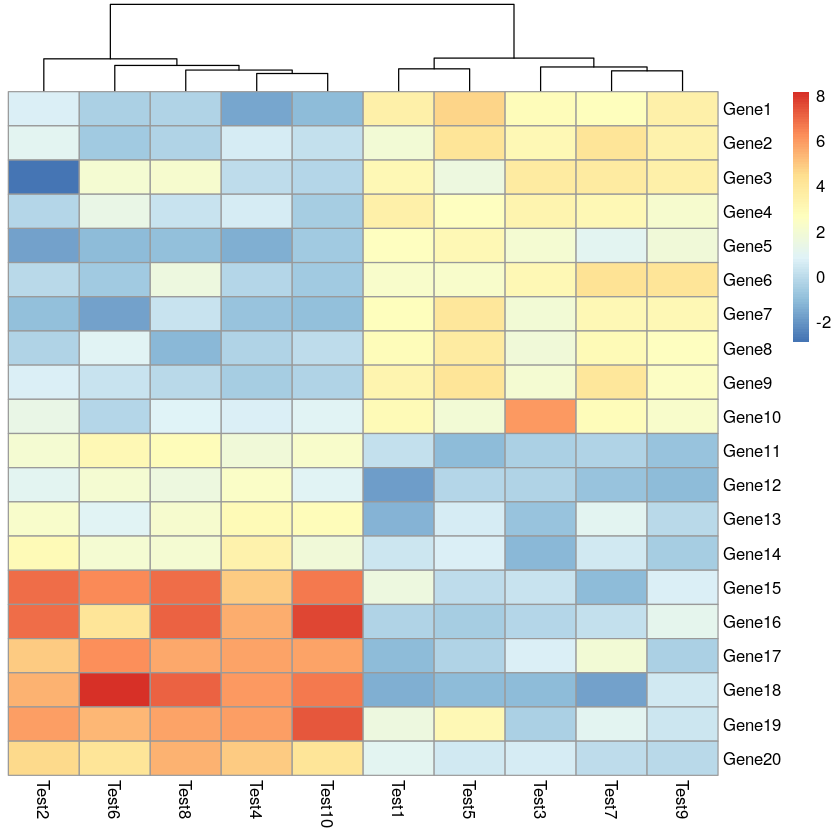


phetmp> # Show text within cells
phetmp> pheatmap(test, display_numbers = TRUE)


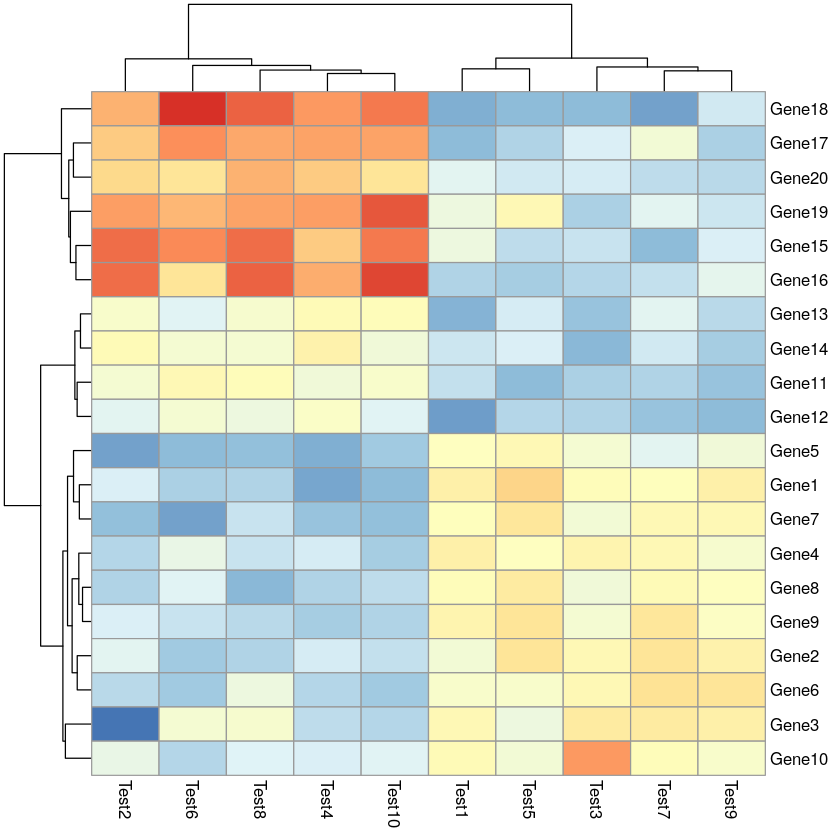


phetmp> pheatmap(test, display_numbers = TRUE, number_format = "%.1e")


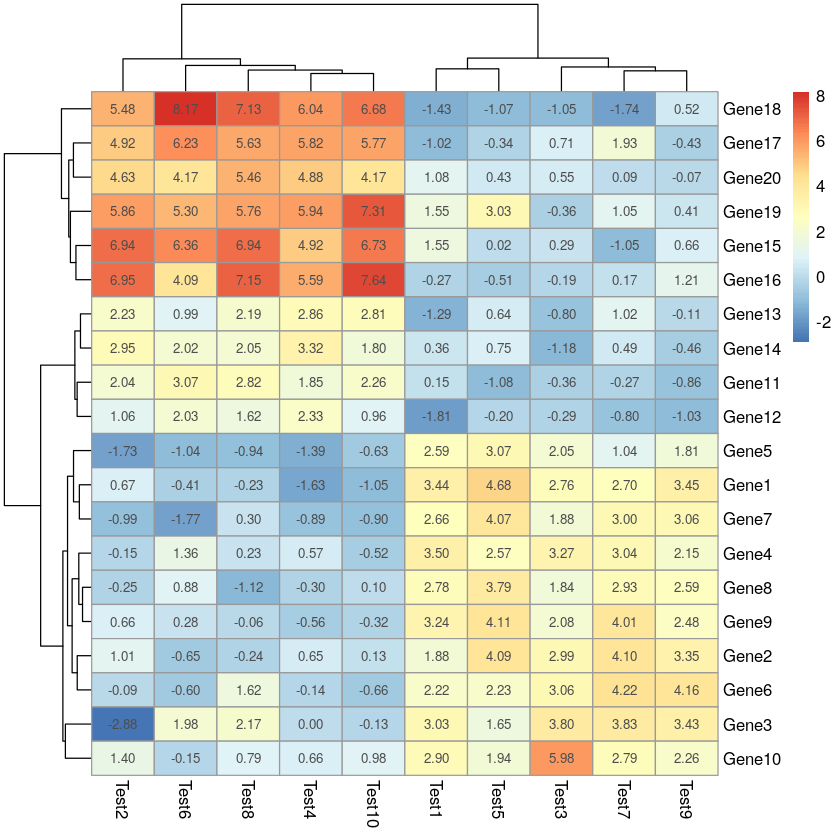


phetmp> pheatmap(test, display_numbers = matrix(ifelse(test > 5, "*", ""), nrow(test)))


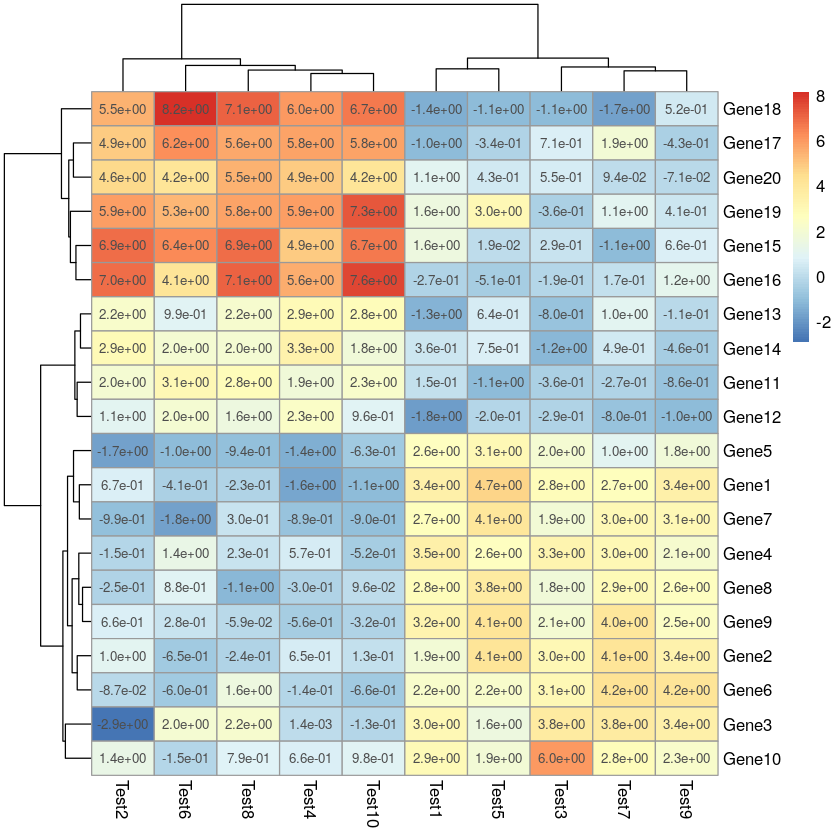


phetmp> pheatmap(test, cluster_row = FALSE, legend_breaks = -1:4, legend_labels = c("0",
phetmp+ "1e-4", "1e-3", "1e-2", "1e-1", "1"))


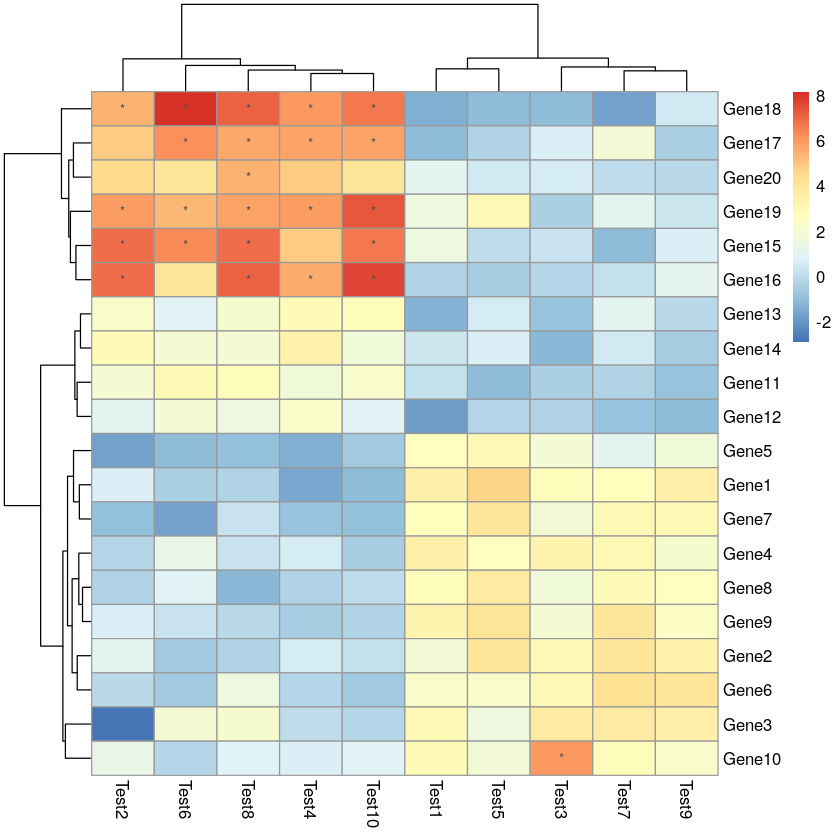


phetmp> # Fix cell sizes and save to file with correct size
phetmp> pheatmap(test, cellwidth = 15, cellheight = 12, main = "Example heatmap")

phetmp> pheatmap(test, cellwidth = 15, cellheight = 12, fontsize = 8, filename = "test.pdf")

phetmp> # Generate annotations for rows and columns
phetmp> annotation_col = data.frame(
phetmp+                     CellType = factor(rep(c("CT1", "CT2"), 5)), 
phetmp+                     Time = 1:5
phetmp+                 )

phetmp> rownames(annotation_col) = paste("Test", 1:10, sep = "")

phetmp> annotation_row = data.frame(
phetmp+                     GeneClass = factor(rep(c("Path1", "Path2", "Path3"), c(10, 4, 6)))
phetmp+                 )

phetmp> rownames(annotation_row) = paste("Gene", 1:20, sep = "")

phetmp> # Display row and color annotations
phetmp> pheatmap(test, annotation_col = annotation_col)

phetmp> pheatmap(test, annotation_col = annotation_col, annotation_legend = FALSE)

phetmp> pheatmap(test, annotation_col = annotation_col, an

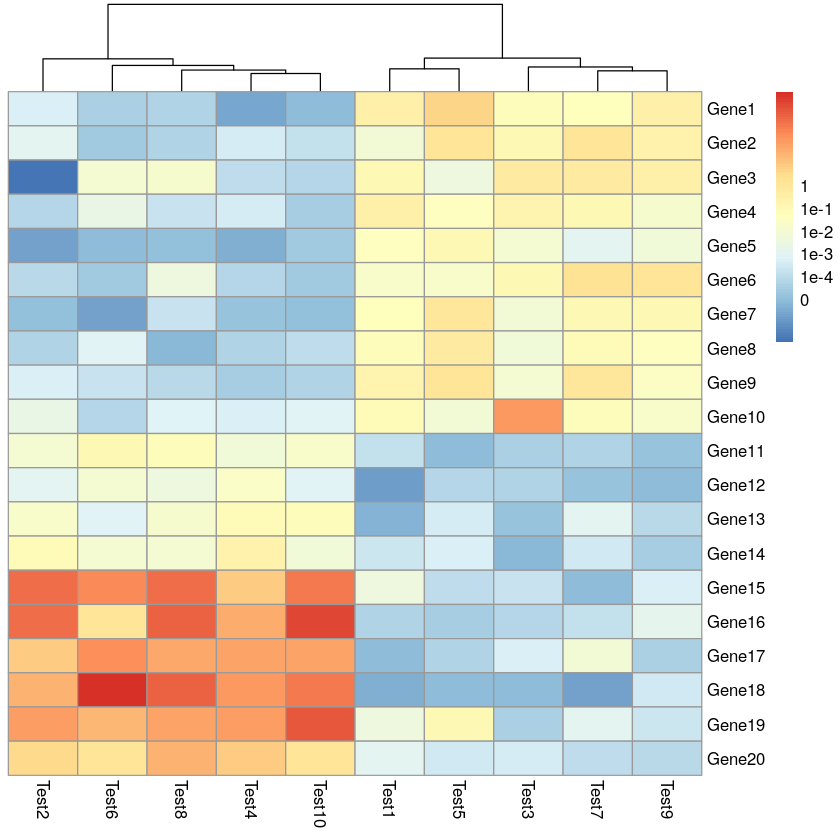

In [17]:
example(pheatmap)

In [62]:
(sump <- read.table("data/sum_p.txt", header = T, row.names = 1, sep = "\t", quote = ""))

,CWB3,CWB2,CWB1,YH3,YH2,YH1,Bar1,Bar2,Bar3,YW1,YW2,YW3,EB1,EB2,EB3,all
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Crenarchaeota,44.6742099,30.3680583,25.8941345,1.3135648,0.27311744,2.0028612,1.00143062,4.72103004,2.48406815,0.16907270,0.06502796,0.2210951,1.9768500,1.3005592,1.5606711,118.025751
Diapherotrites,0.4291845,0.8973859,0.8713747,0.2861230,0.03901678,0.1300559,0.14306152,0.16907270,0.44219014,1.31356483,0.53322929,0.3901678,0.3511510,0.5722461,0.5072181,7.075042
Euryarchaeota,24.2814410,6.9840031,12.2642736,78.6968396,95.79919365,89.9336715,9.20795942,19.92456756,19.18324880,71.50474704,72.74027832,73.9497984,84.8614904,87.6837040,87.5406425,834.555859
Thaumarchaeota,0.2210951,0.2601118,0.3251398,0.1560671,0.06502796,0.1820783,0.05202237,0.02601118,0.05202237,0.05202237,0.13005592,0.0000000,0.1950839,0.1300559,0.2210951,2.067889
unidentified_Archaea,11.0157368,24.8276759,23.9042788,4.6820133,0.33814540,0.9233971,47.30133958,26.01118481,28.15710756,13.42177136,9.93627260,10.9246976,7.0880479,5.4623488,5.7094551,219.703473
others,19.3783327,36.6627650,36.7407985,14.8653921,3.48549876,6.8279360,42.29418650,49.14813370,49.68136299,13.53882169,16.59513591,14.5142411,5.5273768,4.8510860,4.4609182,318.571986


In [14]:
ncol(sump)

[1] 16

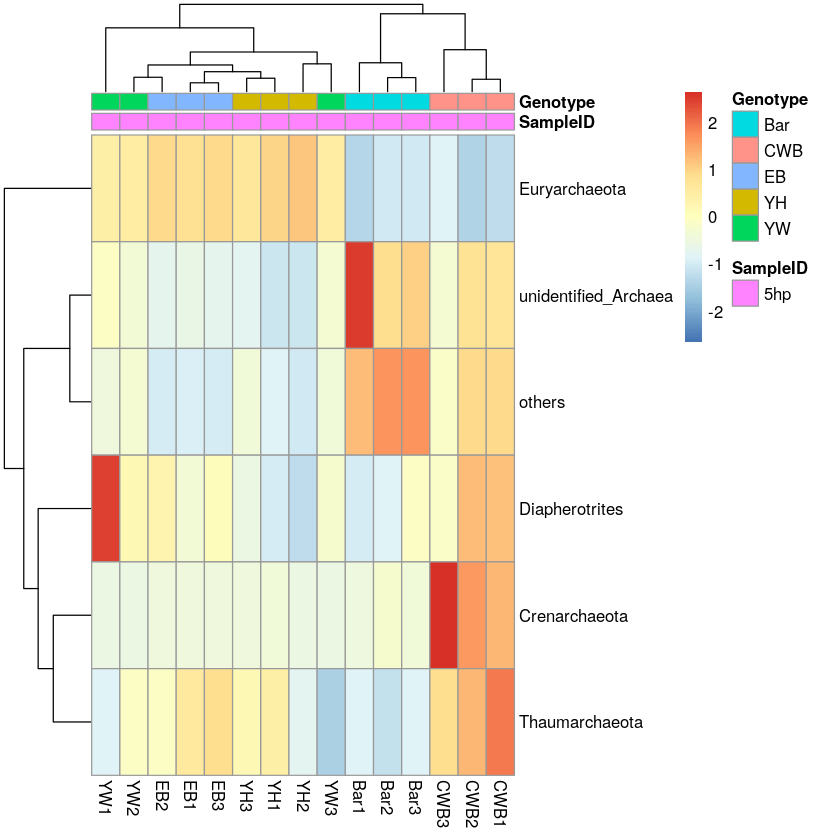

In [63]:
pheatmap(sump[,1:ncol(sump)-1], scale = "row",  annotation_col =  metadata2)